In [74]:
import numpy as np
import matplotlib.pyplot as plt
# display plots in this notebook
%matplotlib inline

plt.rcParams['figure.figsize'] = (10, 10)        # large images
plt.rcParams['image.interpolation'] = 'nearest'  # don't interpolate: show square pixels
plt.rcParams['image.cmap'] = 'gray'  # use grayscale output rather than a (potentially misleading) color heatmap

In [75]:
import caffe

In [76]:
caffe.set_mode_cpu()

In [77]:
net = caffe.Net('./prototxt/ResNet-50-deploy.prototxt',
               './caffe/ResNet-50-model.caffemodel', caffe.TEST)

In [78]:
def vis_square(data):
    """Take an array of shape (n, height, width) or (n, height, width, 3)
       and visualize each (height, width) thing in a grid of size approx. sqrt(n) by sqrt(n)"""
    
    # normalize data for display
    data = (data - data.min()) / (data.max() - data.min())
    
    # force the number of filters to be square
    n = int(np.ceil(np.sqrt(data.shape[0])))
    padding = (((0, n ** 2 - data.shape[0]),
               (0, 1), (0, 1))                 # add some space between filters
               + ((0, 0),) * (data.ndim - 3))  # don't pad the last dimension (if there is one)
    data = np.pad(data, padding, mode='constant', constant_values=1)  # pad with ones (white)
    
    # tile the filters into an image
    data = data.reshape((n, n) + data.shape[1:]).transpose((0, 2, 1, 3) + tuple(range(4, data.ndim + 1)))
    data = data.reshape((n * data.shape[1], n * data.shape[3]) + data.shape[4:])
    
    plt.imshow(data); plt.axis('off')

In [79]:
net.params

OrderedDict([('conv1', <caffe._caffe.BlobVec at 0x11ef11fa0>),
             ('bn_conv1', <caffe._caffe.BlobVec at 0x103a6e910>),
             ('scale_conv1', <caffe._caffe.BlobVec at 0x11ef06670>),
             ('res2a_branch1', <caffe._caffe.BlobVec at 0x11ef06fa0>),
             ('bn2a_branch1', <caffe._caffe.BlobVec at 0x11ef06ec0>),
             ('scale2a_branch1', <caffe._caffe.BlobVec at 0x11ef069f0>),
             ('res2a_branch2a', <caffe._caffe.BlobVec at 0x11ef06ad0>),
             ('bn2a_branch2a', <caffe._caffe.BlobVec at 0x11ef067c0>),
             ('scale2a_branch2a', <caffe._caffe.BlobVec at 0x11ef06d00>),
             ('res2a_branch2b', <caffe._caffe.BlobVec at 0x11ef06830>),
             ('bn2a_branch2b', <caffe._caffe.BlobVec at 0x11ef06280>),
             ('scale2a_branch2b', <caffe._caffe.BlobVec at 0x11ef064b0>),
             ('res2a_branch2c', <caffe._caffe.BlobVec at 0x11ef061a0>),
             ('bn2a_branch2c', <caffe._caffe.BlobVec at 0x11ef062f0>),
           

# conv1

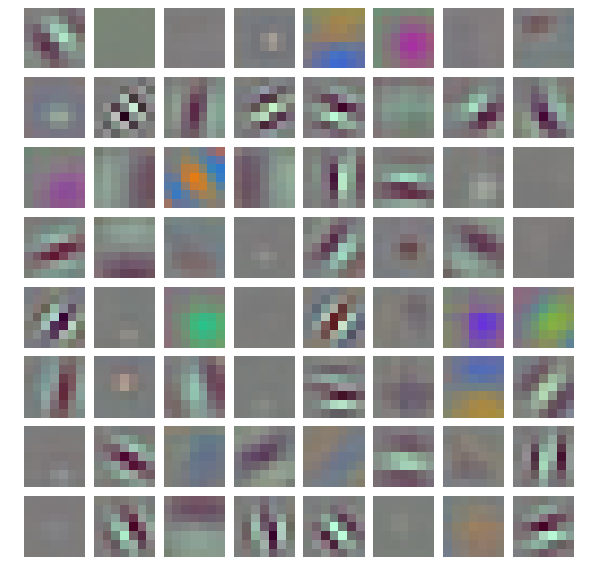

In [80]:
filters = net.params['conv1'][0].data
vis_square(filters.transpose(0, 2, 3, 1))

# res2a_branch2b 

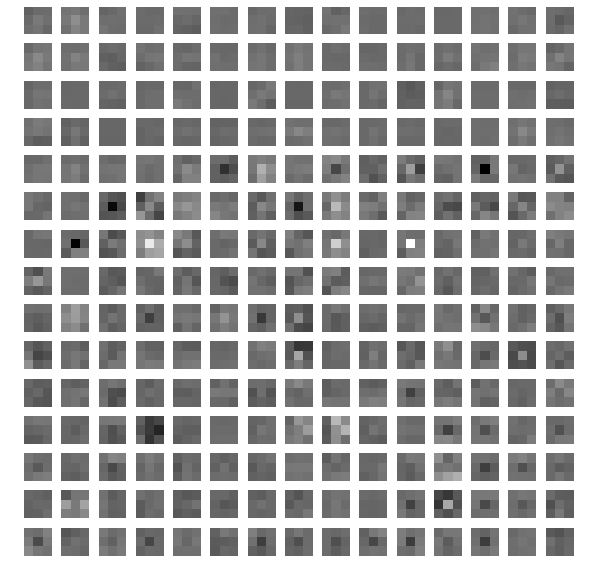

In [81]:
filters2 = net.params['res2a_branch2b'][0].data
vis_square(np.reshape(filters2, (-1, 3, 3))[:225,:,:])

# res5c_branch2b

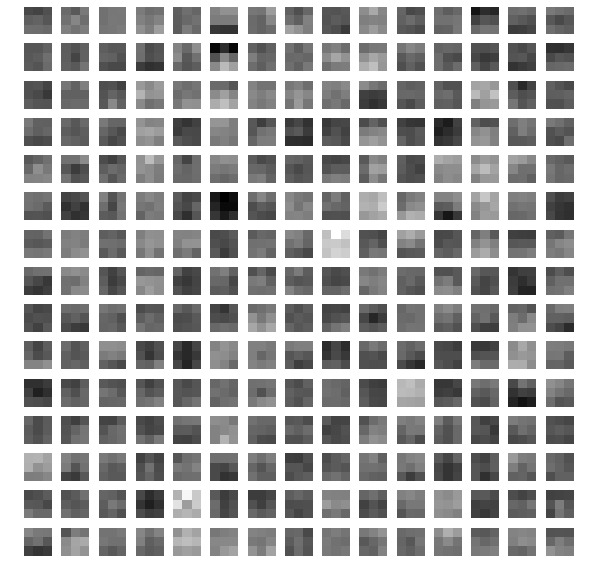

In [82]:
filters3 = net.params['res5c_branch2b'][0].data
vis_square(np.reshape(filters3, (-1, 3, 3))[:225,:,:])